In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import warnings

In [20]:
data = pd.read_csv("HW3_click.csv")
data.head(5)

,Unnamed: 0,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,21250780,7.028591e+18,1,14102608,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15699,320,50,1722,0,35,-1,79
1,17358227,1.557482e+18,0,14102508,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,15708,320,50,1722,0,35,-1,79
2,25035648,1.249146e+19,0,14102709,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,...,1,3,21189,320,50,2424,1,161,100192,71
3,19418340,1.541478e+19,0,14102518,1005,1,0a742914,510bd839,f028772b,ecad2386,...,1,0,20634,320,50,2374,3,39,-1,23
4,26160847,1.339255e+19,0,14102717,1005,0,85f751fd,c4e18dd6,50e219e0,3e2bf98d,...,1,0,18539,320,50,2104,0,559,-1,171


In [22]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = data.drop(data.columns["0", "1", '3' ,"4", "5", "6", "7","8", "9"], axis=1, inplace=True)
data.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [19]:
cleaned_df = data.drop(data.columns[3], axis=1, inplace=True)
cleaned_df = data.drop(data.columns[4], axis=1, inplace=True)
data.head()

,hour,C1,banner_pos,C17,C21
0,14102608,1005,0,1722,79
1,14102508,1005,0,1722,79
2,14102709,1005,0,2424,71
3,14102518,1005,1,2374,23
4,14102717,1005,0,2104,171


In [18]:
cleaned_df = data.drop(data.columns[3], axis=1, inplace=True)
data.head()

,hour,C1,banner_pos,C15,C17,C19,C21
0,14102608,1005,0,320,1722,35,79
1,14102508,1005,0,320,1722,35,79
2,14102709,1005,0,320,2424,161,71
3,14102518,1005,1,320,2374,39,23
4,14102717,1005,0,320,2104,559,171


In [8]:
data.dtypes

click                int64
hour                 int64
C1                   int64
banner_pos           int64
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object

In [9]:
data.shape

(200000, 18)

In [10]:
X = data.drop('click',axis='columns')
y = data['click']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [11]:
X.shape

(200000, 17)

In [12]:
y.shape

(200000,)

In [13]:
X_train[:10]

,hour,C1,banner_pos,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
79518,14102408,1002,0,07d7df22,8aeb9f8c,b22a3c02,f9ba9057,0,0,6991,320,50,613,2,39,100233,32
180438,14102601,1005,0,07d7df22,a99f214a,09223a78,158e4944,1,0,20634,320,50,2374,3,39,100148,23
152408,14102320,1005,0,8ded1f7a,a99f214a,6fa99964,235bcfc1,1,0,17017,320,50,1873,3,39,-1,23
23823,14102805,1005,0,8ded1f7a,66acfa9b,5fe5ab5b,de19f57c,1,0,22681,320,50,2528,0,39,100076,221
194414,14103015,1005,0,0f2161f8,a03fe903,c7e50844,be87996b,1,2,15701,320,50,1722,0,35,-1,79
117886,14102810,1005,0,0f2161f8,a99f214a,1b30265b,7ed3c15f,1,0,23144,320,50,2665,0,35,100165,221
67018,14102405,1005,1,07d7df22,a99f214a,47822fb2,a9a7b3d8,1,0,8330,320,50,761,3,175,100075,23
63714,14102309,1005,1,07d7df22,a99f214a,60bab2b1,5ec45883,1,0,22137,320,50,1702,0,1059,100075,110
166061,14102905,1005,0,0f2161f8,a99f214a,c5d6abda,99e427c9,1,0,21611,320,50,2480,3,297,100111,61
21414,14102516,1005,0,07d7df22,a99f214a,4bb23fcf,4ceb2e0b,1,0,15708,320,50,1722,0,35,-1,79


In [19]:
cols_to_scale = ['hour','C1','device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [20]:
for col in df:
    print(f'{col}: {df[col].unique()}')

click: [1 0]
hour: [0.5503792  0.44203684 0.65980498 0.45287107 0.66847237 0.75839653
 0.87215601 0.12892741 0.11700975 0.88190683 0.24160347 0.6695558
 0.00975081 0.33261105 0.55362947 0.01083424 0.21885157 0.55904659
 0.34344529 0.88624052 0.11375948 0.00866739 0.01408451 0.22751896
 0.75947996 0.77248104 0.98266522 0.10942579 0.00650054 0.8808234
 0.76814735 0.11809317 0.87973998 0.54387866 0.97508126 0.44095341
 0.65872156 0.44853738 0.55579632 0.87540628 0.7616468  0.87323944
 0.33802817 0.55146262 0.12459372 0.1191766  0.0227519  0.45070423
 0.12676056 0.78223185 0.02166847 0.44637053 0.65005417 0.01516793
 0.98808234 0.4496208  0.12351029 0.99133261 1.         0.44420368
 0.43770314 0.98483207 0.44528711 0.7659805  0.32502709 0.77681473
 0.77031419 0.21993499 0.78114843 0.98699892 0.87107259 0.00433369
 0.34994583 0.76706392 0.65655471 0.76923077 0.77789816 0.00325027
 0.55471289 0.12134345 0.97616468 0.87432286 0.23293608 0.54821235
 0.22426869 0.22643554 0.98049837 0.22535211 

In [21]:
X = df.drop('click',axis='columns')
y = df['click']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [22]:
y_train.value_counts()

0    116209
1     23791
Name: click, dtype: int64

In [23]:
y.value_counts()

0    165972
1     34028
Name: click, dtype: int64

In [24]:
X_train[:10]

,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
79518,0.333694,0.090909,0,0,0.0,0.279534,0.221239,0.02988,0.189414,0.666667,0.003322,0.999850,0.122047
180438,0.542795,0.363636,0,1,0.0,0.855966,0.221239,0.02988,0.855198,1.000000,0.003322,0.999002,0.086614
152408,0.238353,0.363636,0,1,0.0,0.703143,0.221239,0.02988,0.665784,1.000000,0.003322,0.000000,0.086614
23823,0.763814,0.363636,0,1,0.0,0.942454,0.221239,0.02988,0.913422,0.000000,0.003322,0.998284,0.866142
194414,0.991333,0.363636,0,1,0.4,0.647541,0.221239,0.02988,0.608696,0.000000,0.001107,0.000000,0.307087
117886,0.769231,0.363636,0,1,0.0,0.962016,0.221239,0.02988,0.965217,0.000000,0.001107,0.999172,0.866142
67018,0.330444,0.363636,1,1,0.0,0.336108,0.221239,0.02988,0.245369,1.000000,0.078627,0.998274,0.086614
63714,0.226436,0.363636,1,1,0.0,0.919469,0.221239,0.02988,0.601134,0.000000,0.568106,0.998274,0.429134
166061,0.872156,0.363636,0,1,0.0,0.897245,0.221239,0.02988,0.895274,1.000000,0.146179,0.998633,0.236220
21414,0.450704,0.363636,0,1,0.0,0.647837,0.221239,0.02988,0.608696,0.000000,0.001107,0.000000,0.307087


In [25]:
len(X_train.columns)

13

# Question#2 part a

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [37]:
def log_reg(X_train, y_train, X_test, y_test):
    
    model = LogisticRegression()

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Accuracy", acc, "\n")
    
    y_pred = model.predict(X_test)
    print("preds", y_pred[:10], "\n")
    
    R2 = r2_score(y_test,y_pred)
    print("R2 Score", R2, "\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)
    print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

In [38]:
# # pass -1 to use Logistics Regression without weights
log_reg(X_train, y_train, X_test, y_test)

Accuracy 0.8281166666666666 

preds [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

R2 Score -0.21466637865239524 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     49763
           1       0.18      0.00      0.00     10237

    accuracy                           0.83     60000
   macro avg       0.50      0.50      0.45     60000
weighted avg       0.72      0.83      0.75     60000

Confusion Matrix : 
[[49666    97]
 [10216    21]]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# part b 

In [42]:
from sklearn import linear_model    # L1 regularization

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=1)

In [43]:
lasso_reg.score(X_test, y_test)

-3.2768512598924104e-06

In [44]:
lasso_reg.score(X_train, y_train)

0.0

In [47]:
y_pred = lasso_reg.predict(X_test)

R2 = r2_score(y_test,y_pred)
print("R2 Score", R2, "\n")
#print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

R2 Score -3.2768512598924104e-06 



# L2 Regularization

In [48]:
ridge_reg = linear_model.RidgeClassifier(alpha = 50, max_iter = 100, tol = 1)
ridge_reg.fit(X_train, y_train)

RidgeClassifier(alpha=50, max_iter=100, tol=1)

In [49]:
ridge_reg.score(X_test, y_test)

0.8282333333333334

In [50]:
ridge_reg.score(X_train, y_train)

0.8289714285714286

In [51]:
y_pred = ridge_reg.predict(X_test)
print("preds", y_pred[:20], "\n")

preds [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 



In [52]:
cl_rep = classification_report(y_test,y_pred)
print(cl_rep)
R2 = r2_score(y_test,y_pred)
print("R2 Score", R2, "\n")
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     49763
           1       0.15      0.00      0.00     10237

    accuracy                           0.83     60000
   macro avg       0.49      0.50      0.45     60000
weighted avg       0.71      0.83      0.75     60000

R2 Score -0.21384191781165374 

Confusion Matrix : 
[[49679    84]
 [10222    15]]


# after L2 
regularization accuracy is little bit improved as shown in the matrix

# Part C: K-Fold Cross-Validation

In [59]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

model = LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Cross Validation Scores are [0.83092857 0.83121429 0.82617857 0.82639286 0.82935714]
Average Cross Validation score :0.8288142857142857
Confusion Matrix : 
[[49666    97]
 [10216    21]]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part d: Grid Search 

In [60]:
X = df.drop('click',axis='columns')
y = df['click']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [61]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('R2 Score : ' + str(r2_score(y_test,y_pred)))


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8281166666666666
Precision Score : 0.17796610169491525
Recall Score : 0.002051382240890886
F1 Score : 0.004056011588604538
R2 Score : -0.21466637865239524
Confusion Matrix : 
[[49666    97]
 [10216    21]]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print('R2 Score : ' + str(r2_score(y_test,y_pred_acc)))


#Logistic Regression (Grid Search) Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_acc)))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following erro

Accuracy Score : 0.8281166666666666
Precision Score : 0.17796610169491525
Recall Score : 0.002051382240890886
F1 Score : 0.004056011588604538
R2 Score : -0.21466637865239524
Confusion Matrix : 
[[49666    97]
 [10216    21]]


C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Question 01

In [78]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(2, 2 * np.pi, 100)
y = np.linspace(1, 2*np.pi, 100)
y

array([1.        , 1.05336551, 1.10673102, 1.16009652, 1.21346203,
       1.26682754, 1.32019305, 1.37355856, 1.42692407, 1.48028957,
       1.53365508, 1.58702059, 1.6403861 , 1.69375161, 1.74711711,
       1.80048262, 1.85384813, 1.90721364, 1.96057915, 2.01394465,
       2.06731016, 2.12067567, 2.17404118, 2.22740669, 2.2807722 ,
       2.3341377 , 2.38750321, 2.44086872, 2.49423423, 2.54759974,
       2.60096524, 2.65433075, 2.70769626, 2.76106177, 2.81442728,
       2.86779279, 2.92115829, 2.9745238 , 3.02788931, 3.08125482,
       3.13462033, 3.18798583, 3.24135134, 3.29471685, 3.34808236,
       3.40144787, 3.45481338, 3.50817888, 3.56154439, 3.6149099 ,
       3.66827541, 3.72164092, 3.77500642, 3.82837193, 3.88173744,
       3.93510295, 3.98846846, 4.04183396, 4.09519947, 4.14856498,
       4.20193049, 4.255296  , 4.30866151, 4.36202701, 4.41539252,
       4.46875803, 4.52212354, 4.57548905, 4.62885455, 4.68222006,
       4.73558557, 4.78895108, 4.84231659, 4.8956821 , 4.94904

In [81]:
import numpy as np

abs(-5)

5

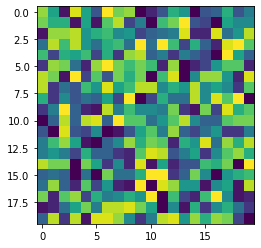

In [86]:
x = np.random.randint(0,20, size=(20,20))
plt.imshow(x)
plt.show()

In [87]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

In [94]:
print(thisdict["year"])

1964


In [92]:
array = ['1', '2', '23', '34', '87']
array[3]

'34'